In [34]:
import pandas as pd
from itertools import product, count

In [35]:
from matplotlib import pyplot as plt

In [36]:
import random

In [37]:
import networkx as nx

## Primo network: famiglie

In [67]:
# Generatore di nodi - identificati con interi:
c = count()

edges = []
nodes = []

# Inizialmente, è infetto solo l'individuo 0:
sick = [0]

for gr in range(1, 6):
    # Famiglie di 4 persone...
    gr_nodes = [next(c) for i in range(4)]
    
    for i in gr_nodes:
        nodes.append((i, gr, int(i in sick)))
    
    # ... tutte connesse tra di loro:
    for i, j in product(gr_nodes, gr_nodes):
        if i != j:
            edges.append((i, j, 1))

In [68]:
df_edges = pd.DataFrame(edges, columns=['i', 'j', 'color'])
df_nodes = pd.DataFrame(nodes, columns=['i', 'color', 'sick'])

In [69]:
df_edges.to_csv('data/famiglie_edges.csv', index=False)
df_nodes.to_csv('data/famiglie_nodes.csv', index=False)

#### Figura

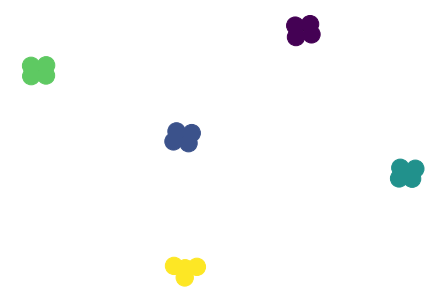

In [70]:
G = nx.Graph()
G.add_edges_from([e[:2] for e in edges])
nx.draw(G, node_color=[n[1] for n in nodes])

## Secondo network: amici

In [72]:
# Per la riproducibilità:
random.seed(414)

# Riutilizza i nodi di prima:
edges = list(edges)
rel = {n[0] : [] for n in nodes}
for (n1, n2, c) in edges:
    rel[n1].append(n2)

# 100 passaggi di rewiring (che lascia inalterato il numero di vertici di ogni nodo):
for i in range(100):
    # estrai due vertici a caso:
    i1 = random.randint(0, len(rel) - 1)
    i2 = random.randint(0, len(rel) - 1)
    j1 = rel[i1][random.randint(0, 2)]
    j2 = rel[i2][random.randint(0, 2)]
    print(i1, i2, j1, j2)
    
    # ... che siano diversi e non siano già legati
    if i1 != i2 and j1 != j2 and (i1 not in rel[i2]) and ([j1] not in rel[j2]):
        for oldi, oldj in (i1, j1), (i2, j2):
            rel[oldi].remove(oldj)
            rel[oldj].remove(oldi)
        for newi, newj in (i1, i2), (j1, j2):
            rel[newi].append(newj)
            rel[newj].append(newi)

edges = [(n1, n2, 2) for n2 in rel[n1] for n1 in rel]

13 11 15 10
7 19 5 17
2 8 3 11
4 11 6 9
8 15 9 12
19 9 16 6
14 4 15 5
19 8 18 10
13 12 14 9
9 5 12 15
4 15 14 12
16 3 17 1
13 17 12 5
10 2 9 0
6 3 5 0
5 1 0 17
7 13 19 17
8 17 19 18
14 16 12 3
14 4 13 15
10 19 18 17
6 5 7 9
6 4 5 7
17 18 8 19
18 15 16 8
3 18 11 15
9 15 0 13
8 17 17 0
5 4 12 14
16 18 6 19
3 4 6 6
8 4 2 6
14 15 16 10
1 9 5 7
19 7 9 13
8 9 16 15
2 11 10 13
11 9 2 8
5 4 4 11
0 5 17 7
2 17 8 8
9 3 11 12
9 11 1 4
1 8 2 17
15 2 16 17
12 16 14 18
8 5 1 4
17 5 7 7
7 0 19 1
10 1 16 4
1 12 19 16
19 13 10 0
1 14 4 18
7 9 17 11
7 15 5 11
5 12 8 1
15 7 7 9
17 4 11 16
11 2 12 15
19 16 16 19
14 4 12 8
12 1 15 10
3 3 6 18
15 0 10 5
17 5 18 12
14 14 15 15
9 10 7 0
2 11 11 16
14 3 1 6
11 16 16 11
2 18 6 4
10 14 9 15
13 15 19 7
5 12 17 18
9 3 3 9
18 18 3 3
16 5 19 10
4 6 6 4
15 15 9 13
7 8 0 1
10 10 14 14
14 0 4 15
11 4 2 17
14 10 10 14
13 14 15 10
12 13 1 10
10 19 19 10
16 0 11 1
5 19 12 6
16 8 17 12
15 1 9 11
9 10 3 19
11 17 9 2
18 14 2 13
13 6 9 12
0 15 14 10
19 17 5 18
4 11 15 5
11 8 

In [76]:
df_edges = pd.DataFrame(edges, columns=['i', 'j', 'color'])

In [77]:
df_edges.to_csv('data/famiglie_amici_edges.csv', index=False)

#### FIgura

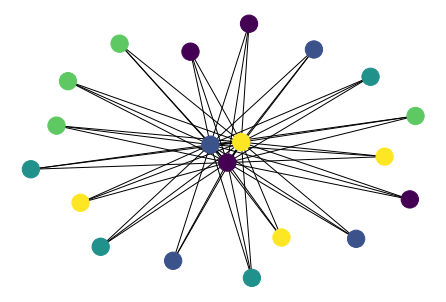

In [79]:
G = nx.Graph()
G.add_edges_from([e[:2] for e in edges])
nx.draw(G, node_color=[n[1] for n in nodes])

In [80]:
rel

{0: [7, 16, 15],
 1: [6, 10, 15],
 2: [9, 17, 6],
 3: [18, 14, 19],
 4: [15, 11, 13],
 5: [11, 16, 18],
 6: [1, 13, 2],
 7: [0, 19, 8],
 8: [7, 16, 11],
 9: [10, 2, 12],
 10: [1, 9, 14],
 11: [5, 4, 8],
 12: [13, 17, 9],
 13: [12, 6, 4],
 14: [3, 18, 10],
 15: [4, 1, 0],
 16: [5, 0, 8],
 17: [12, 19, 2],
 18: [3, 14, 5],
 19: [7, 3, 17]}

## Terzo network: famiglie più un amico a testa

In [47]:
# Per la riproducibilità:
random.seed(415)

# Per ogni nodo, memorizza i contatti:
nodes = {}

# Ripartiamo da zero con i nodi:
c = count()

# 30 famiglie...
for gr in range(1, 30):
    # ... da 4 persone l'una
    gr_nodes = [next(c) for i in range(4)]
    # ... connesse tra di loro
    for n in gr_nodes:
        nodes[n] = [m for m in gr_nodes if m != n]

# Amici ancora da assegnare:
to_match = set(nodes)

for n in nodes:
    if n not in to_match:
        continue
    # Assegna a n come amico...
    to_match.remove(n)
    # ... un altro amico a caso...
    peer = random.choice(list(to_match))
    # ... che non sia lui stesso:
    while peer == n:
        random.choice(list(to_match))

    # Presentazioni:
    nodes[n].append(peer)
    nodes[peer].append(n)

    # Non cerca più un amico:
    to_match.remove(peer)

# Calcoliamo le distanze

# Distanza massima:
GENERATIONS = 6

# Nodi già raggiunti
reached = {0 : 0}

# Nodi dell'ultima "generazione" (partiamo solo da 0)
last = [0]
# ... e della successiva
new = []

for generation in range(1, GENERATIONS):
    # Prendi un nodo appena raggiunto...
    for n in last:
        # ... e considera tutti i suoi contatti...
        for cont in nodes[n]:
            # ... non ancora raggiunti...
            if cont in reached:
                continue
            # ... nella nuova generazione.
            reached[cont] = generation
            new.append(cont)
    # Via con la prossima generazione
    last = new
    new = []

# Ricreiamo la lista di nodi e vertici nel solito formato
edges = []
points = []

generations = {g : [] for g in range(GENERATIONS)}
generations['Più di 5'] = []
for n in nodes:
    gen = reached.get(n, 'Più di 5')
    generations[gen].append(n)

# Scorriamo le generazioni una alla volta così che i nodi
# sono in ordine nel csv risultante:
for gen in generations:
    for n in generations[gen]:
        for p in nodes[n]:
            edges.append((n, p, 0))
        points.append((n, gen, 2 if gen == 0 else 1))

In [48]:
df_edges = pd.DataFrame(edges, columns=['i', 'j', 'color'])
df_nodes = pd.DataFrame(points, columns=['i', 'color', 'size'])

In [49]:
df_edges.to_csv('data/big_edges.csv', index=False)
df_nodes.to_csv('data/big_nodes.csv', index=False)

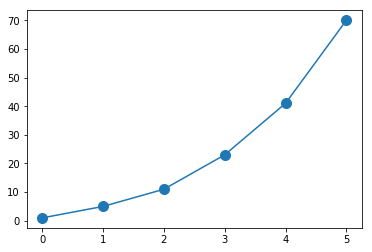

In [50]:
# 'color' è la distanza: contiamo i valori, ordiniamoli e facciamone la somma cumulata:
growth = df_nodes['color'].value_counts().drop('Più di 5').sort_index().cumsum()
growth.plot(marker='.', markersize=20)

In [51]:
growth.rename('Persone raggiunte').to_csv('data/big_growth.csv')

#### Figura

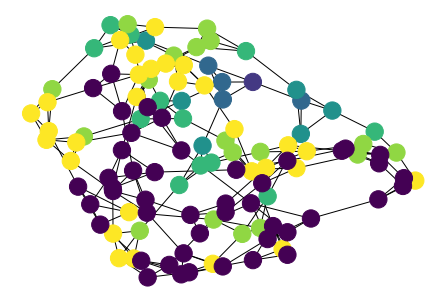

In [52]:
G = nx.Graph()
G.add_edges_from([e[:2] for e in edges])
nx.draw(G, node_color=[(-1 if n[1] == 'Più di 5' else n[1]) for n in points])